# **1. 고객 주문 데이터 파악하기**

### 1-1. 데이터 셋
- 가상 온라인 리테일 사이트의 2010/12 ~ 2011/12 까지의 주문 기록 데이터
- 약 500,000건의 데이터

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.read_csv('/content/drive/MyDrive/파이썬AI프로젝트202307/3_데이터 분석/OnlineRetail.csv')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
retail = pd.read_csv('/content/drive/MyDrive/파이썬AI프로젝트202307/3_데이터 분석/OnlineRetail.csv')

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 1-2. 컬럼 살펴보기
- InvoiceNo : 주문번호
- StockCode : 아이템 아이디
- Description : 상품 설명
- Quantity : 상품 주문 수량
- InvoiceDate : 주문 시간
- UnitPrice : 상품 가격
- CustomerID : 고객 아이디
- Country : 고객 거주 지역(국가)

In [6]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# 결측값 체크
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
# 비회원 주문 정보를 제거
# retail = retail[pd.notnull(retail['CustomerID'])]
retail = retail.dropna(subset = 'CustomerID', axis = 0)

In [16]:
len(retail)

406829

In [18]:
# 비회원을 제거하면서, 상품 설명이 없던 행들도 전부 삭제가 되었다!
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [19]:
# 구입 수량이 1 이상, 구입 가격이 1 이상인 데이터만 저장
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]

In [21]:
len(retail)

397884

In [22]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [23]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
# 고객의 총 지출비용 구하기
# 지출 비용 = 수량 * 가격
retail['CheckoutPrice'] = retail['Quantity'] * retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [25]:
retail.to_csv('OnlineRetailClean.csv')

In [26]:
retail = pd.read_csv('OnlineRetailClean.csv')

In [27]:
retail.info() # 64비트면 메모리가 낭비 될 수도 있기에, 바꿔보자!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int64  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float64
 7   CustomerID     397884 non-null  float64
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 30.4+ MB


In [29]:
# 원하는 타입으로 데이터 불러오기
dtypes = {'UnitPrice' : np.float32, 'CustomerID' : np.int32, 'Quantity' : np.int32}
retail = pd.read_csv('OnlineRetailClean.csv', dtype = dtypes)

In [30]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int32  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float32
 7   CustomerID     397884 non-null  int32  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(2), object(4)
memory usage: 25.8+ MB


In [33]:
# 참고!
# 숫자 자료형의 표현 정수를 알아보기 위한 코드
value = np.iinfo(np.int64).min
print(value)

-9223372036854775808


### 1-3. 날짜 타입 데이터 변환
- 문자열로 데이터를 로딩하는 것보다 datetime 타입으로 로딩하는 것이 날짜 분석 및 계산에 용이

In [34]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [35]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [37]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


In [38]:
retail = retail.drop('Unnamed: 0', axis = 1)

In [39]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### 1-4. 매출 구하기

In [41]:
# 전체 매출
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [44]:
# 국가별 매출
rev_by_countries = retail.groupby('Country')['CheckoutPrice'].sum().sort_values()
rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

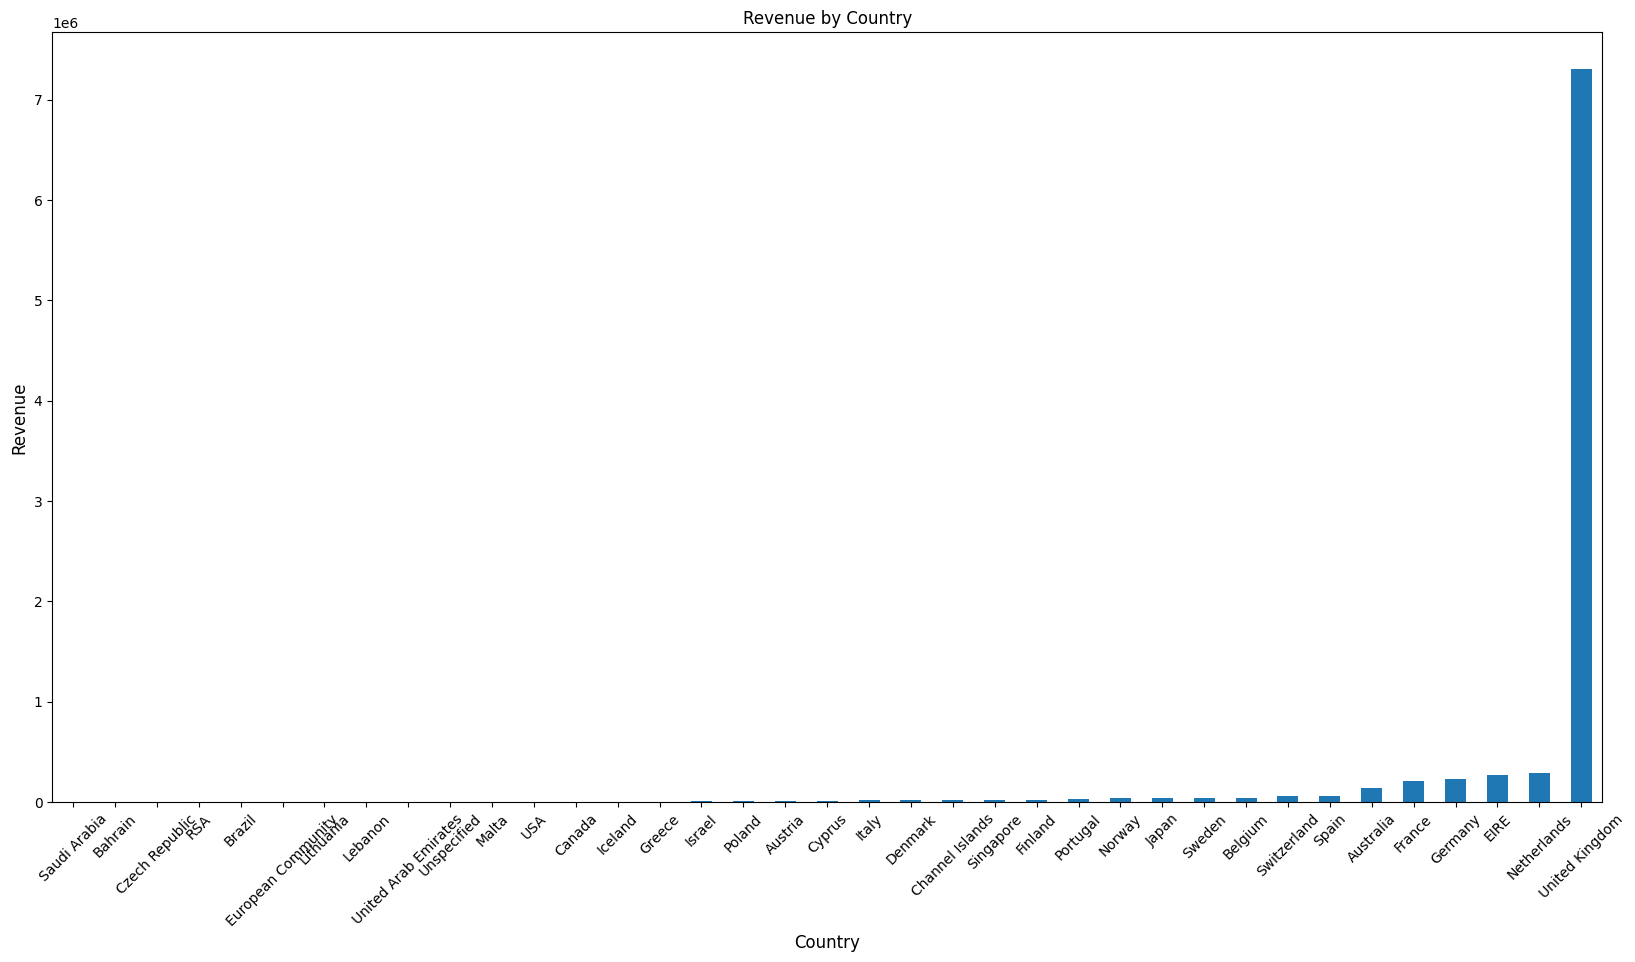

In [50]:
plot = rev_by_countries.plot(figsize = (20, 10), kind = 'bar')
plot.set_xlabel('Country', fontsize = 12)
plot.set_ylabel('Revenue', fontsize = 12)
plot.set_title('Revenue by Country', fontsize = 12)
plot.set_xticklabels(labels = rev_by_countries.index, rotation = 45)

In [100]:
# 국가별 매출 퍼센트 확인
(rev_by_countries / total_revenue) * 100

Country
Saudi Arabia             0.001637
Bahrain                  0.006154
Czech Republic           0.009277
RSA                      0.011247
Brazil                   0.012833
European Community       0.014591
Lithuania                0.018640
Lebanon                  0.019008
United Arab Emirates     0.021347
Unspecified              0.029929
Malta                    0.030585
USA                      0.040178
Canada                   0.041143
Iceland                  0.048365
Greece                   0.053421
Israel                   0.081039
Poland                   0.082306
Austria                  0.114445
Cyprus                   0.152505
Italy                    0.196189
Denmark                  0.212709
Channel Islands          0.229486
Singapore                0.238787
Finland                  0.253002
Portugal                 0.375248
Norway                   0.405833
Japan                    0.419870
Sweden                   0.430665
Belgium                  0.462288
Switze

### 1-5. 월별 매출 구하기

In [53]:
# 그룹화를 해서 월별 매출을 구할려고 하는데,
# 그대로 그룹화하면 시분초까지 전부 같아야한다.
retail['InvoiceDate'].sort_values(ascending = False)

397883   2011-12-09 12:50:00
397876   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
397872   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [77]:
# 2011-12-09 12:50:00 -> 201112
# 2010-12-01 08:26:00 -> 201012
# 2010-08-01 08:26:00 -> 201008
def extract_month(date):
  month = str(date.month)
  if date.month < 10:
    month = '0' + month
  return str(date.year) + month

In [78]:
date = retail['InvoiceDate'][0]
extract_month(date)

'201012'

In [79]:
date = retail['InvoiceDate'][27000]
extract_month(date)

'201101'

In [82]:
# 함수를 실행시키는게 아닌, 함수 자체를 넘겨준다.
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month)['CheckoutPrice'].sum()
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

In [83]:
# 매번 그래프를 그리기 약간 귀찮다!
# 막대그래프를 그려주는 함수를 우리가 만들자!
def plot_bar(df, xlabel, ylabel, title, titlesize = 15, labelsize = 12, figsize = (20, 10), rotation = 45):
  plot = df.plot(figsize = figsize, kind = 'bar')
  plot.set_xlabel(xlabel, fontsize = 12)
  plot.set_ylabel(ylabel, fontsize = 12)
  plot.set_title(title, fontsize = 12)
  plot.set_xticklabels(labels = df.index, rotation = rotation)

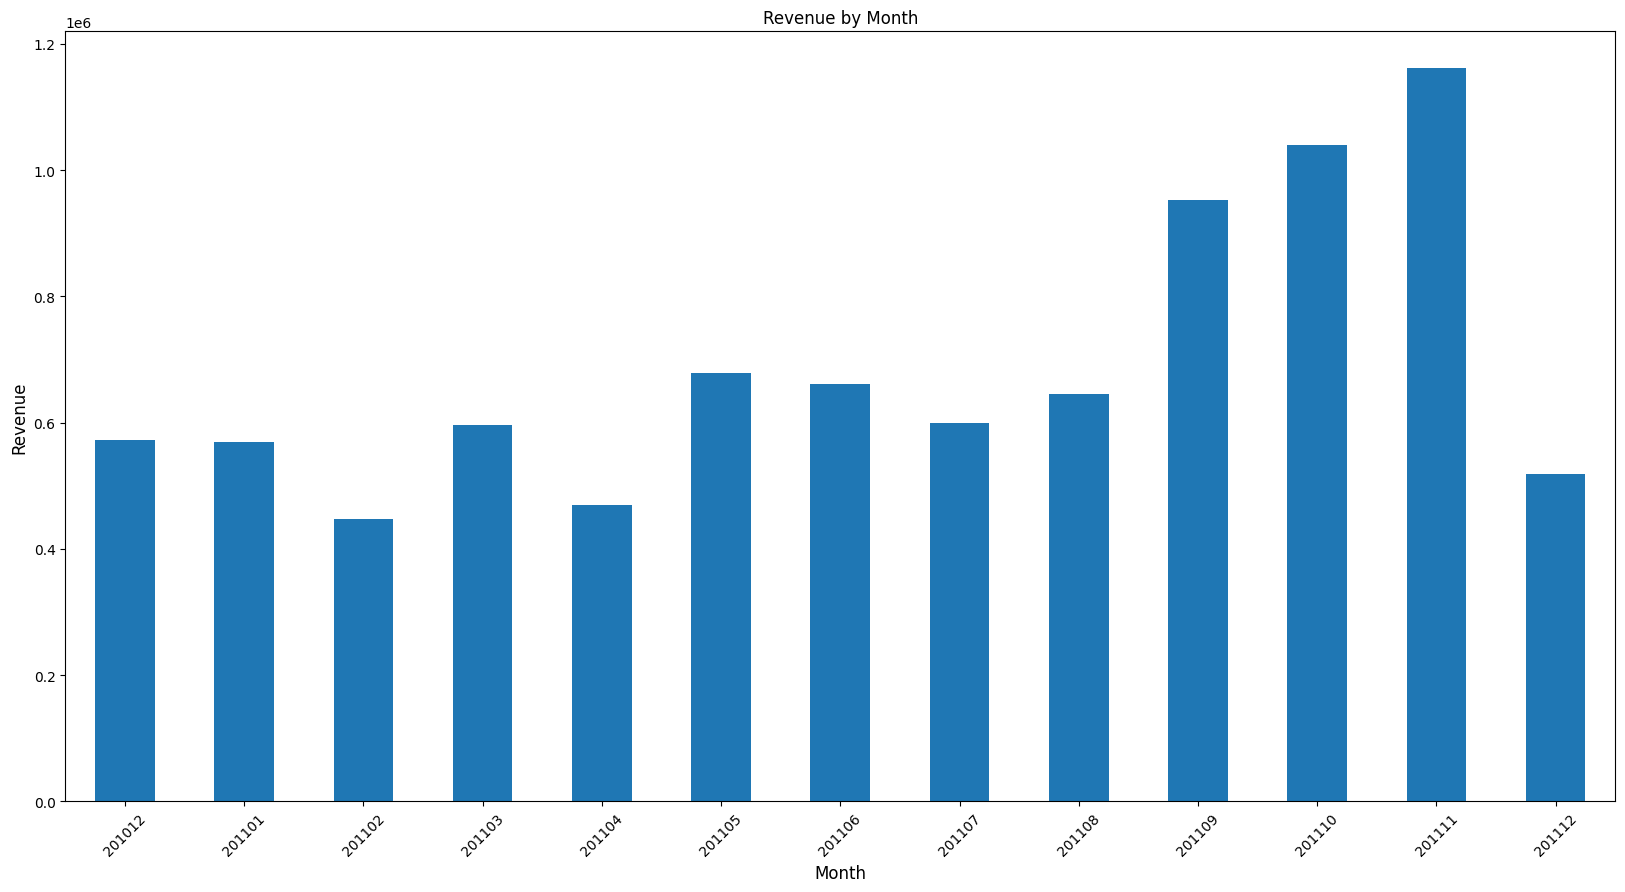

In [84]:
# 12월 9일까지만 데이터가 존재한다!
# 그래프를 가지고 월별 수익을 분석해보면,
# 년말에 많은 수익을 올리는 걸 확인할 수 있다.
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

### 1-6. 요일별 매출 구하기

In [87]:
def extract_dow(date):
  return date.dayofweek

In [88]:
# 위에서 실습한 방식으로 구현!
rev_by_dow = retail.set_index('InvoiceDate').groupby(extract_dow)['CheckoutPrice'].sum()
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [95]:
# 람다식 사용해서 구현
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek)['CheckoutPrice'].sum()
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

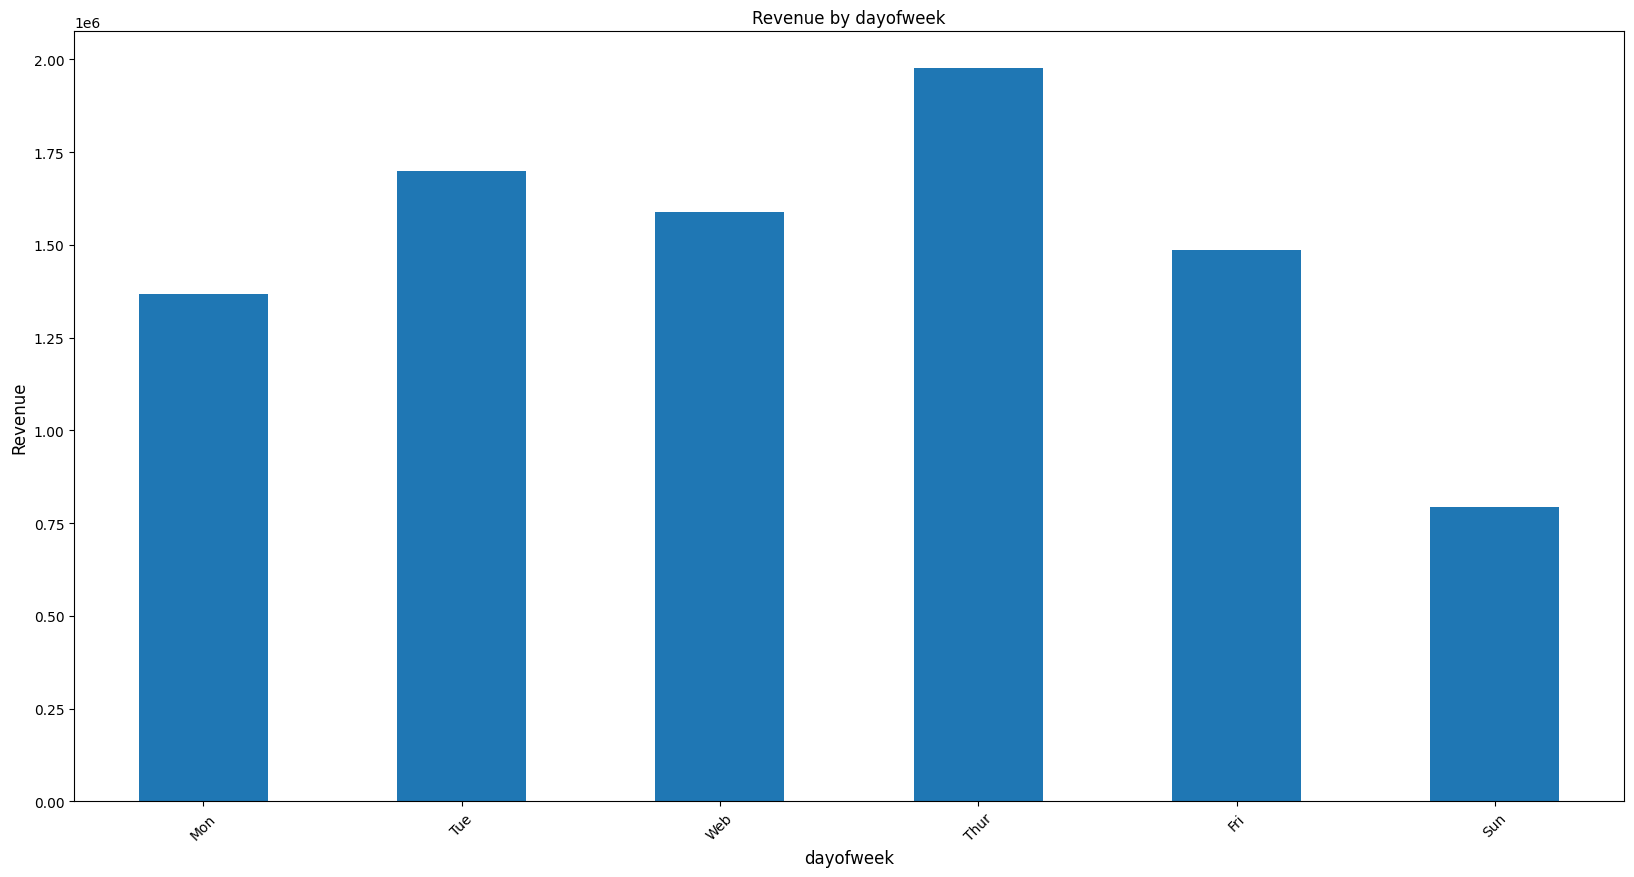

In [96]:
# 그래프 그려보기 까지
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Web', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'dayofweek', 'Revenue', 'Revenue by dayofweek')

### 1-7. 시간대별 매출 구하기

In [97]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour)['CheckoutPrice'].sum()
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

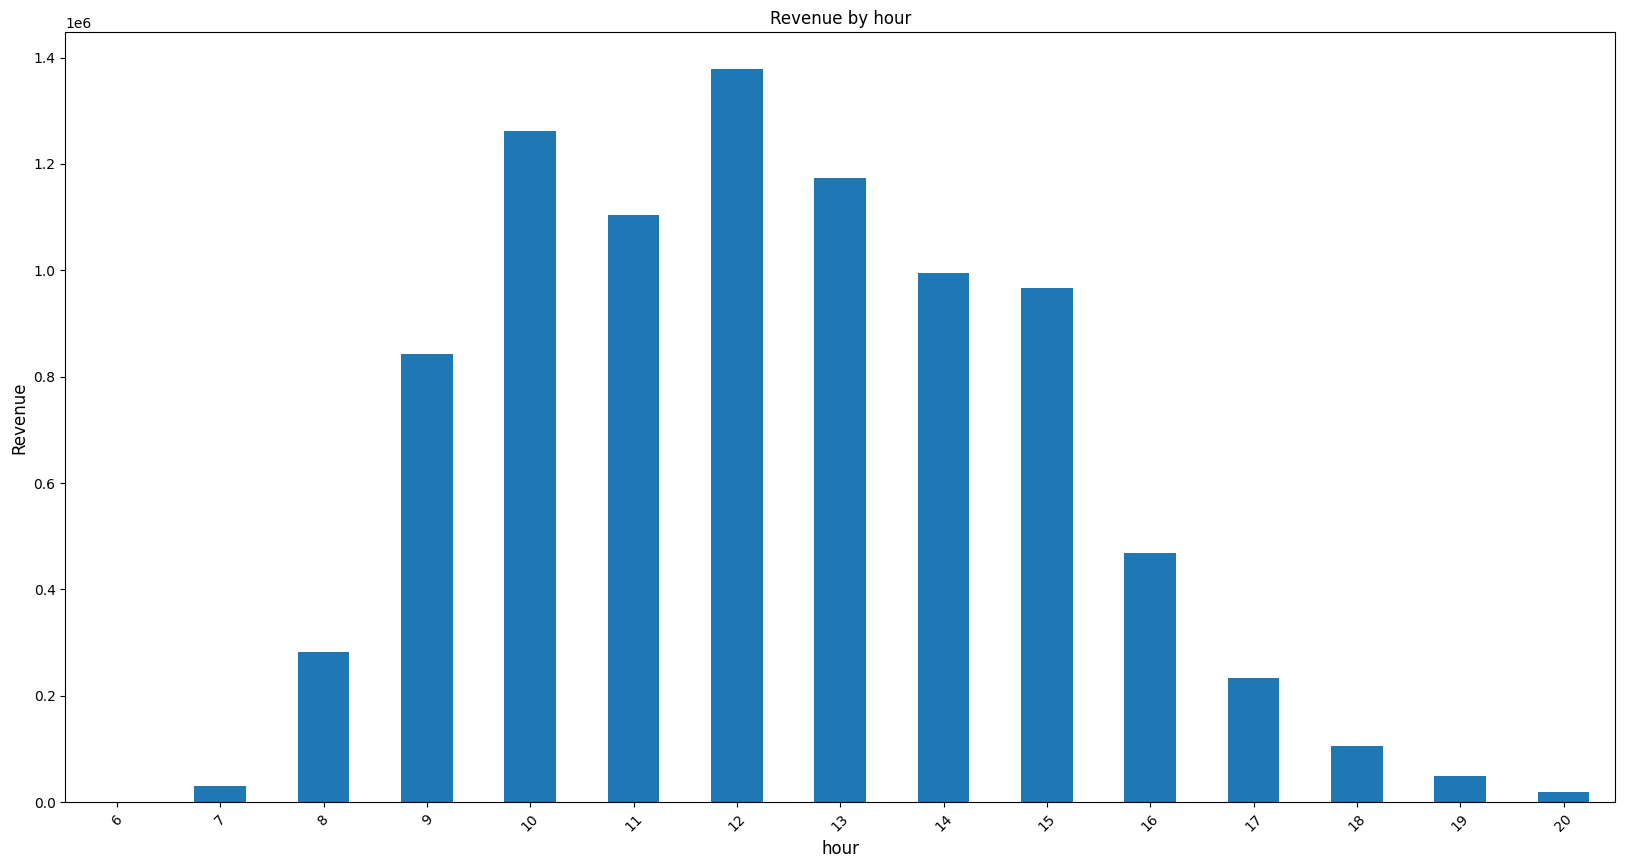

In [98]:
plot_bar(rev_by_hour, 'hour', 'Revenue', 'Revenue by hour')

# **2. 매출 데이터로부터 Insight**

- 전체 매출의 약 82% 가 영국에서 발생
- 11년도 가장 많은 매출이 발생한 달은 11월
- 매출은 꾸준히 상승하고 있다. (12월 데이터는 9일까지 포함)
- 일주일 중 목요일까지는 성장세, 이후로는 하락 (토요일은 영업을 하지 않음)
- 새벽 6시에 주문 시작, 20시에 마감